# ЛР №1 по курсу "Классическое машинное обучение и распознавание образов"

# Методы сбора данных, ч.1. (Распознование образов)

1. Загрузите изображение "img1" и "img2"
2. Напишите функцию *get_hist_features()* для расчета вектора признаков изображения на основе рассчета энергетических характеристик гистограммы изображения (среднее значение, дисперсия, энтропия, энергия), визуализируйте гистограмму
3. Напишите функцию *get_GLCM_features()* для расчета вектора признаков изображения на основе матрицы смежности (энергия, контраст, энтропия) на основе формул и с применением graycoprops
4. Напишите функцию *get_GLRLM_features()* для расчета вектора признаков изображения на основе матрицы длин серии (SSL, SSHL, LSLL, LSHL) на основе формул и с применением glrlm
5. Напишите функцию *get_LBP_features()* для расчета вектора признаков изображения на основе ЛБШ, постройте гистоаграммы для двух изображений
6. Выполните расчет признаков каждым из методов для изображений "img1" и "img2", сравните результаты

In [127]:
# importing matplotlib modules
from skimage import io
import matplotlib.pyplot as plt
from skimage.io import imsave, imread
import numpy as np
import cv2
from skimage import feature
from skimage.feature import graycomatrix, graycoprops

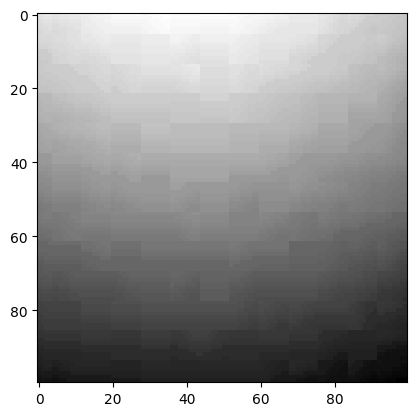

In [4]:
img1 = imread("image1.png")
plt.imshow(img1, cmap="gray")


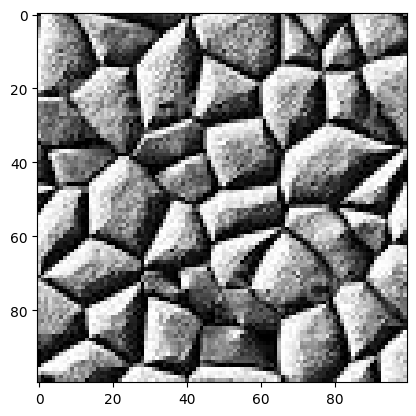

In [5]:
img2 = imread("image2.png")
plt.imshow(img2, cmap="gray")

In [42]:
def get_hist_features(img):
    img_new = img.flatten()
    mean = np.sum(img_new)
    variance = np.sum(((np.arange(10000) - mean) ** 2) * img_new)
    entropy = -np.sum(img_new[img_new > 0] * np.log(img_new[img_new > 0] + 1e-10))  # Добавляем маленькое значение для избежания log(0)
    energy = np.sum(img_new ** 2)
    plt.hist(img_new)
    plt.title('Гистограмма изображения')
    plt.xlabel('Интенсивность пикселя')
    plt.ylabel('Вероятность')
    plt.show()
    return np.array([mean, variance, entropy, energy])


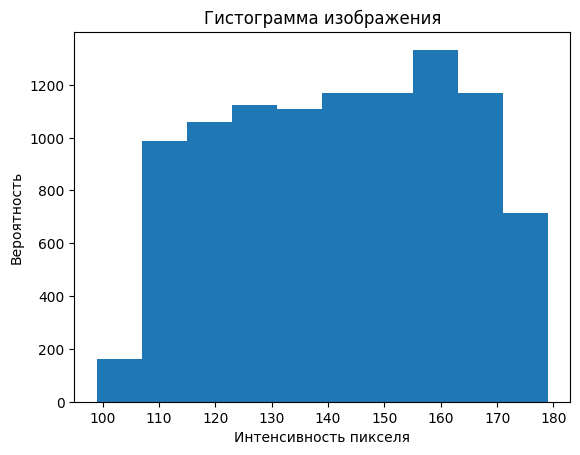

[ 1.41539300e+06  2.81713339e+18 -7.02420470e+06  9.76267000e+05]


In [46]:
features1 = get_hist_features(img1)
print(features1)

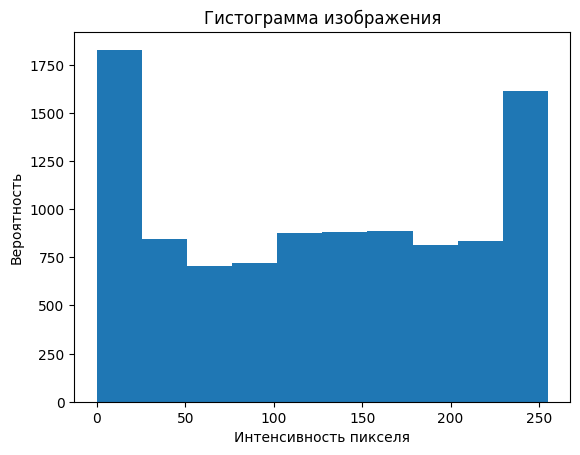

[ 1.25918400e+06  1.98076074e+18 -6.43592889e+06  9.51656000e+05]


In [47]:
features2 = get_hist_features(img2)
print(features2)

In [122]:

def get_GLCM_features(img, distances=[1], angles=[0]):
    glcm = feature.graycomatrix(img, distances, angles, symmetric=True, normed=True)
    res =[]
    res1 = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            res1.append((i-j)**2*img[i][j])
            res.append(img[i][j]**2)
    energy = sum(res)
    contrast = np.sum(res1)
    energy1 = feature.graycoprops(glcm, 'energy')[0][0]
    contrast1 = feature.graycoprops(glcm, 'contrast')[0][0]
    normalized_glcm = glcm / np.sum(glcm)
    entropy = -np.sum(img[img > 0] * np.log(img[img > 0] + 1e-10))
    entropy1 = -np.sum(normalized_glcm[normalized_glcm > 0] * np.log(normalized_glcm[normalized_glcm > 0] + 1e-10))  # Добавляем маленькое значение для избежания log(0)
    # print(glcm[:, :, 0, 0])
    # plt.imshow(normalized_glcm[:, :, 0, 0], cmap='gray')
    # plt.title('Матрица смежности (GLCM)')
    # plt.axis('off')
    # plt.show()
# def energy(x):
#   res=[]
#   for i in range(x.shape[0]):
#     for j in range(x.shape[1]):
#       res.append(x[i][j]**2)
#   return math.sqrt(sum(res))
# energy(norm_glcm)
    # Возвращаем вектор признаков
    features1 = [energy, contrast, entropy]
    features2 = [energy1, contrast1, entropy1]
    print("Вектор признаков GLCM по формулам:", features1)
    print("Вектор признаков GLCM по graycoprops:", features2)

In [123]:
get_GLCM_features(img1)


Вектор признаков GLCM по формулам: [204359051, 2326060299, -7024204.70222139]
Вектор признаков GLCM по graycoprops: [0.10271917769521416, 0.3488888888888889, 4.918649202259069]


In [125]:
get_GLCM_features(img2)

Вектор признаков GLCM по формулам: [229581416, 2111624418, -6435928.885857301]
Вектор признаков GLCM по graycoprops: [0.014287485132274283, 3560.5284848484853, 9.262372307902034]


In [131]:

def get_GLRLM_features(img):
    img = (img / 255 * 255).astype(np.uint8)  # Приведение к диапазону 0-255
    # Вычисление GLRLM
    glrlm = feature.graycoprops(feature.graycomatrix(img, [1], [0], symmetric=True, normed=True), 'contrast')
    # Вычисление характеристик GLRLM
    # Сначала создадим GLRLM
    max_gray_level = 256
    max_run_length = 64  # Максимальная длина серии
    glrlm_matrix = np.zeros((max_gray_level, max_run_length), dtype=int)
    for i in range(img.shape[0]):
        for j in range(img.shape[1] - 1):
            gray_level = img[i, j]
            run_length = 1
            while j + 1 < img.shape[1] and img[i, j + 1] == gray_level:
                run_length += 1
                j += 1
            if run_length < max_run_length:
                glrlm_matrix[gray_level, run_length] += 1
    # Вычисление характеристик
    SRE = np.sum(glrlm_matrix) / np.sum(glrlm_matrix.sum(axis=1) ** 2)
    LRE = np.sum(glrlm_matrix.sum(axis=1) ** 2) / np.sum(glrlm_matrix)
    GLN = np.sum(glrlm_matrix.sum(axis=0) ** 2) / np.sum(glrlm_matrix)
    RLN = np.sum(glrlm_matrix ** 2) / np.sum(glrlm_matrix)

    # Визуализация GLRLM
    plt.imshow(glrlm_matrix, cmap='gray', aspect='auto')
    plt.title('Матрица длин серии (GLRLM)')
    plt.xlabel('Длина серии')
    plt.ylabel('Уровень серого')
    plt.colorbar()
    plt.show()

    # Возвращаем вектор признаков
    return np.array([SRE, LRE, GLN, RLN])

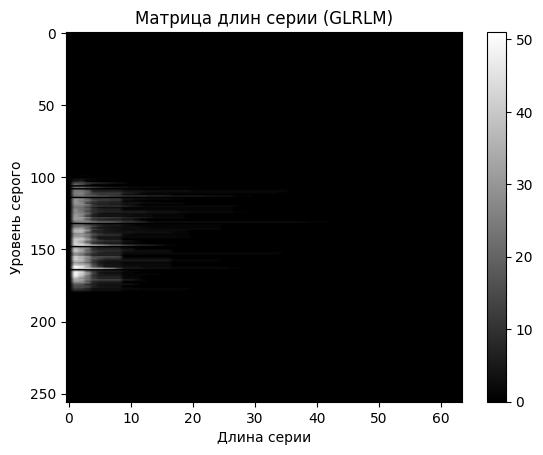

Вектор признаков GLRLM: [6.27413800e-03 1.59384444e+02 1.27514283e+03 2.06133333e+01]


In [132]:

features = get_GLRLM_features(img1)
print("Вектор признаков GLRLM:", features)